In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

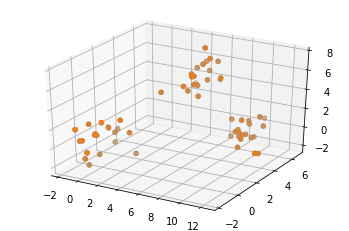

In [ ]:
points = [np.random.randn(3) for _ in range(20)]
points.extend(np.array([np.random.randn(3) + np.array([5,5,5])for _ in range(20)]))
points.extend(np.array([np.random.randn(3) + np.array([10,5,0])for _ in range(20)]))
points = np.array(points)

fig  = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(points[:,0],points[:,1],points[:,2])
ax.scatter(points[:,0],points[:,1],points[:,2])

plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[0.01270851 0.2135218  0.39099555]
 [9.66014926 4.75882452 0.25819887]
 [4.81821878 4.97807752 5.02626224]]


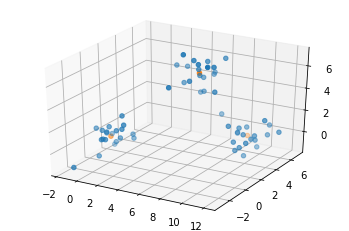

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(points)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

centroids = kmeans.cluster_centers_

fig  = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(points[:,0],points[:,1],points[:,2])
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2])

plt.show()

In [ ]:
def euclidean_distance(a, b):
    return ((a-b)**2).sum() ** 0.5

def kmeans(points, k, max_iters=10):
    # 1.cluster centers를 랜덤하게 생성 - forgy
    points_num = points.shape[0] 
    cluster_centers = points[np.random.choice(points_num, k, replace = False)]

    for iter in range(max_iters):
        # 2.labels 계산
        labels = []

        for p in points:
            min_dist = np.inf
            min_cid = -1
            for cid, c in enumerate(cluster_centers):
                dist = euclidean_distance(p, c)
                if dist < min_dist:
                    min_dist = dist
                    min_cid = cid
            
            labels.append(min_cid)

        labels = np.array(labels)

        # 3. cluster centers 새로 계산
        new_cluster_centers = np.zeros_like(cluster_centers)
        counts = np.zeros(k)

        for l, p in zip(labels, points):
            new_cluster_centers[l] += p
            counts[l] += 1

        for i in range(k):
            new_cluster_centers[i] /= counts[i]

        print("iteration #", iter);
        # 4. cluster centers가 변하지 않을 시 종료
        if np.array_equal(cluster_centers, new_cluster_centers):
            break
        else:
            cluster_centers = new_cluster_centers
    
    return labels, cluster_centers

iteration # 0
iteration # 1


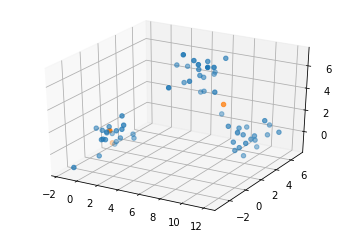

In [ ]:
labels, cluster_centers = kmeans(points, 3)

fig  = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(points[:,0],points[:,1],points[:,2])
ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2])

plt.show()

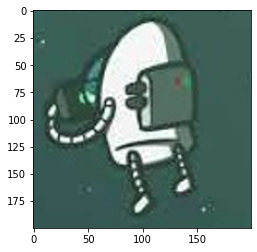

In [ ]:
from PIL import Image

img = Image.open("/content/profile.jpg")

w = 200
h = img.height * w // img.width
img = img.resize((w, h))

plt.imshow(img)
plt.show()

In [ ]:
pixels = np.array(img).reshape(-1, 3).astype(np.float32)

labels, cluster_centers = kmeans(pixels, 2)

iteration # 0
iteration # 1
iteration # 2
iteration # 3
iteration # 4
iteration # 5
iteration # 6


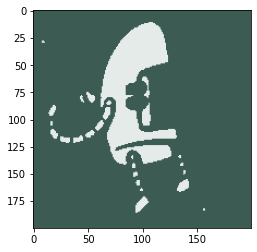

In [ ]:
for l,i in zip(labels, range(pixels.shape[0])):
    pixels[i] = cluster_centers[l]
pixels = pixels.astype(np.uint8)

im_remastered = Image.fromarray(pixels.reshape(h, w, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()